<a href="https://colab.research.google.com/github/ilhamsyah183/Machine-Learning-Documentation/blob/main/Jurnal_Edo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile,os
local_zip = '/content/drive/MyDrive/Datasets_Submisions/jurnal/Cherry.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile,os
os.listdir('/content/Cherry/train')

['Cherry_Powdery_mildew', 'Cherry_healthy']

In [ ]:
base_path = "/content/Cherry"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'valid')

In [ ]:
def dataset_len(path, classes):
    size = []
    for i in classes:
        size.append(len(os.listdir(path+"/train/"+ i))+
                    len(os.listdir(path+"/valid/"+ i)))
        
    df = pd.DataFrame(columns = ['Class', 'Number_Of_Images'])
    df['Class'] = classes
    df['Number_Of_Images'] = size
    
    return df

In [ ]:
classes = os.listdir(base_path+"/train")
print(classes)

['Cherry_Powdery_mildew', 'Cherry_healthy']


In [ ]:
dataset_len(base_path, classes)

,Class,Number_Of_Images
0,Cherry_Powdery_mildew,4198
1,Cherry_healthy,4552


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
  
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
                        train_path,
                        target_size=(150,150),
                        batch_size=32,
                        class_mode='categorical',
                    )

validation_generator = validation_datagen.flow_from_directory(
                        validation_path,
                        target_size=(150,150),
                        batch_size=32,
                        class_mode='categorical',
                    )

Found 7016 images belonging to 2 classes.
Found 1734 images belonging to 2 classes.


In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(2, activation=tf.nn.softmax)
# ])
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation="relu", input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
# # tf.keras.layers.GlobalAveragePooling2D(),
# from tensorflow.keras.applications.vgg16 import VGG16
# # tf.keras.layers.GlobalAveragePooling2D(),
# base_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
# base_model.trainable = False

# model = tf.keras.models.Sequential([
#     base_model,
#     tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(2, activation='softmax')
# ])

# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 128)         589952    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=16,
      verbose=1)

Epoch 1/10
100/100 [==============================] - 294s 3s/step - loss: 0.3500 - accuracy: 0.8120 - val_loss: 0.3429 - val_accuracy: 0.8652
Epoch 2/10
100/100 [==============================] - 289s 3s/step - loss: 0.0733 - accuracy: 0.9761 - val_loss: 0.0479 - val_accuracy: 0.9961
Epoch 3/10
100/100 [==============================] - 289s 3s/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0252 - val_accuracy: 0.9961
Epoch 4/10
100/100 [==============================] - 287s 3s/step - loss: 0.1192 - accuracy: 0.9634 - val_loss: 0.0330 - val_accuracy: 0.9863
Epoch 5/10
100/100 [==============================] - 283s 3s/step - loss: 0.0308 - accuracy: 0.9893 - val_loss: 0.0187 - val_accuracy: 0.9883
Epoch 6/10
100/100 [==============================] - 284s 3s/step - loss: 0.0150 - accuracy: 0.9962 - val_loss: 0.0181 - val_accuracy: 0.9961
Epoch 7/10
100/100 [==============================] - 285s 3s/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0152 - val_accuracy: 0.9961

In [ ]:
# history = model.fit(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=10,
#       validation_data=validation_generator,
#       validation_steps=16,
#       verbose=1)

Epoch 1/10
100/100 [==============================] - 1669s 17s/step - loss: 0.1323 - accuracy: 0.9488 - val_loss: 0.0088 - val_accuracy: 0.9980
Epoch 2/10
100/100 [==============================] - 1651s 17s/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 4.2242e-04 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 1651s 17s/step - loss: 5.3932e-04 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9961
Epoch 4/10
100/100 [==============================] - 1651s 17s/step - loss: 0.0093 - accuracy: 0.9962 - val_loss: 0.0065 - val_accuracy: 0.9980
Epoch 5/10
100/100 [==============================] - 1650s 17s/step - loss: 0.0049 - accuracy: 0.9981 - val_loss: 0.0105 - val_accuracy: 0.9980
Epoch 6/10
100/100 [==============================] - 1661s 17s/step - loss: 0.0027 - accuracy: 0.9987 - val_loss: 0.0098 - val_accuracy: 0.9961
Epoch 7/10
100/100 [==============================] - 1650s 17s/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0076 

In [ ]:
# history = model.fit(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=10,
#       validation_data=validation_generator,
#       validation_steps=16,
#       verbose=1)

Epoch 1/10
100/100 [==============================] - 90s 891ms/step - loss: 0.3534 - accuracy: 0.8616 - val_loss: 0.0389 - val_accuracy: 0.9941
Epoch 2/10
100/100 [==============================] - 88s 875ms/step - loss: 0.0295 - accuracy: 0.9918 - val_loss: 0.0088 - val_accuracy: 0.9980
Epoch 3/10
100/100 [==============================] - 88s 881ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 87s 873ms/step - loss: 0.0633 - accuracy: 0.9787 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 87s 872ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0065 - val_accuracy: 0.9961
Epoch 6/10
100/100 [==============================] - 87s 872ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 88s 875ms/step - loss: 2.3779e-04 - accuracy: 1.0000 - val_loss: 8.9294e-04 

In [ ]:
print("d")

d


In [ ]:
model

Text(0.5, 1.0, 'Model Accuracy')

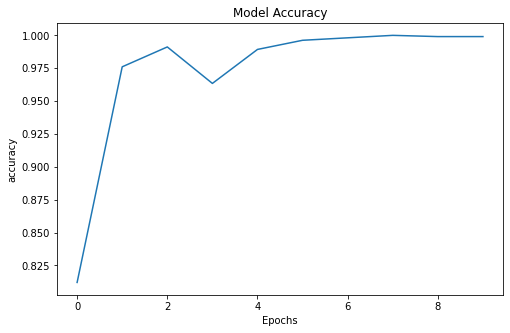

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Model Accuracy")

Text(0.5, 1.0, 'Model Loss')

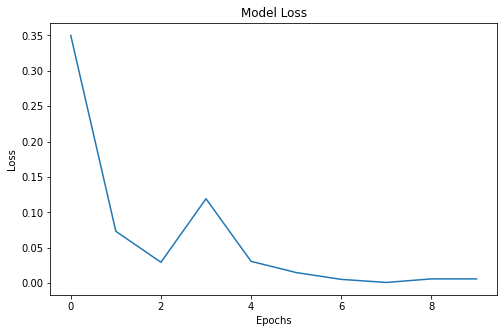

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")

Text(0.5, 1.0, 'Model Validation Loss')

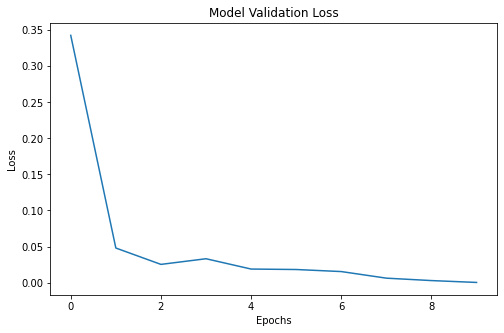

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Validation Loss")

Text(0.5, 1.0, 'Model Validation Accuracy')

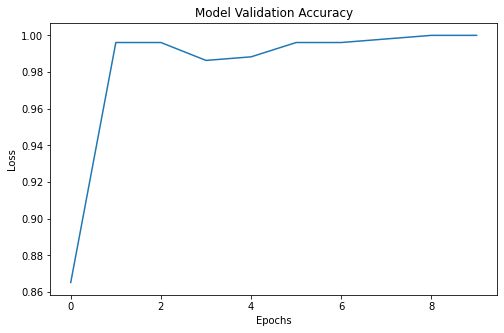

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Validation Accuracy")

In [ ]:
path="CNN_ceri3.hdf5"
history.model.save(path)

Saving Powdery_Milk (3).JPG to Powdery_Milk (3).JPG
Saving Powdery_Milk (4).JPG to Powdery_Milk (4).JPG
Saving Powdery_Milk (5).JPG to Powdery_Milk (5).JPG
Saving Powdery_Milk (6).JPG to Powdery_Milk (6).JPG
Saving Powdery_Milk (7).JPG to Powdery_Milk (7).JPG
Saving Powdery_Milk (8).JPG to Powdery_Milk (8).JPG
Saving Powdery_Milk (9).JPG to Powdery_Milk (9).JPG
Saving Powdery_Milk (10).JPG to Powdery_Milk (10).JPG
Powdery_Milk (3).JPG
Cherry_Powdery_mildew
Powdery_Milk (4).JPG
Cherry_Powdery_mildew
Powdery_Milk (5).JPG
Cherry_Powdery_mildew
Powdery_Milk (6).JPG
Cherry_Powdery_mildew
Powdery_Milk (7).JPG
Cherry_Powdery_mildew
Powdery_Milk (8).JPG
Cherry_Powdery_mildew
Powdery_Milk (9).JPG
Cherry_Powdery_mildew
Powdery_Milk (10).JPG
Cherry_Powdery_mildew


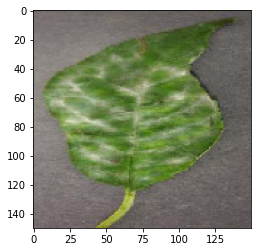

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Datasets_Submisions/jurnal/CNN_ceri3.hdf5')
  
uploaded = files.upload()

  
for fn in uploaded.keys():
  

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  result = np.argmax(classes)
  print(fn)
  if result == 0:
    print('Cherry_Powdery_mildew')
  else:
    print('Cherry_healthy')